<a href="https://colab.research.google.com/github/victorteodoro/projeto-aplicado-ii/blob/main/1_Teste_pr%C3%A1tico_de_aquisi%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste prático de aquisição de dados com Google Earth Engine

*Por Rafael Vidal de Tomy*

Nesta fase de aquisição de dados usaremos a API do Google Earth Engine para adquirir as imagens de satélite para o projeto. Primeiro teremos que configurar uma credencial com uma chave para ter acesso aos recursos.

Depois executaremos dois testes, o primeiro será um download de uma imagem e depois exploraremos as galerias de imagem a atrás de mais opções.

## Autenticação no Google Earth Engine para uso da API

**Antes de iniciar**, o programa abaixo usa token e senha de acesso ftp que não são públicos. Para garantir que apenas os envolvidos tenham acesso às funcionalidades com essas informações restritas, use a **chave de acesso** disponibilizada no material entregue pelo Canvas.

In [1]:
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.kdf.scrypt import Scrypt
from cryptography.fernet import Fernet, InvalidToken
import base64
import json
import getpass

CKEY = getpass.getpass('Digite a chave de acesso: ')
encrypted = "gAAAAABl-JFHOqDe8JpOu-c5PttN_bSVAaX7bGzl4u_TasMasiYT9KlTpfniKwtieOSRmVByjGa-uq5b_LOQNr17s8-TasKtREMuFpuN7kBLs-f8lSu6VLa2TnP7uK1a4Ho0k8qm8BANJxuruXNvrCQltGCzR7AR0iUVSgoijFK7p4n-mntq45oCU-_1JPQCYNI9wmQ5wHYM3PevcBNvkr_uZxyXV7ZpJk2bM7uDXFUcDu-rZppTCSZXNBhHUSaIS9mAFmAflz6r7xnTBG4HdEr0jJyFXzUSfOzZFbh01WwBV173cDuF9UKOXFeTpU_g1i7VRnChUYevIezQKrbD-pHWQx_iVh5naU-HwpC0VhKV0toC5peH1BSDP1Opir8oViw2ue0SypBMemn893T8JTmTg-waaiQc7S5eeLuul-x8C4QcoEFrc-ixw5UtDUKtWqnFmw_-9gi32PifnTVXhW54Y2vhuOnuZQD1bNvXbzwhHQUUz2KV2LC77wOgqW4VkRBAuxGrRAZMQJKjUJUQTi5Ajn4B6RUI5iD9NkOeHYEhS15V3X5fAbLzCVS8LQ2gQhd5DxjfqyCvw8S7W6D1HTUJxmH47ra22ZBmCo_ic5KOTBcRGi_QRx0Bv6LVcZn_LRVxO1UMv6aPvB03QyQx9REl7CoKrX3A_K0zI6X9RnHh65jZrdLds55qeovHYMQFjA1xqGuIkTPkYKYFd5Vy907RX43-maHgbiRq7U5dB6jpXNELwJPk8qjVVwCNiRU-SYnpQHtZ5cyLLG-sMzPl-WJSYc7x5uQ5yXRytz8TbGEHvTumj_Gqhivv360Ul4FJxxcSK8zUxmKn9wXj4JYb3eOnRDnCnKYL9QWqXYj9NMulYXKlZDYKzbDUauSyAg1G1iAqE_P9qHkQIamwyQxrgWJp2EDsDWNclkFjujz9v-aduiU8Vsx5KZbqdVJjL1IhgHSgqroMibY8-p1-E0f4HZpiUgE_etSuYIdK2rzgj4c5GtXZ_plcg0BFBhFqhQKe1QSh13LNuStTlMUp981QcV_pRDWe9hAj7zJ_2CyXfUVnyyvUj9duhQQrgT_7PLRE_FNqAvp_i4AfaJZZZrz_uqiu04SW7CHRPibMI9ivJ4_qFwn8-zOlTxLqSECFVQuOZ3DfNLV3IVYYqtjcWX9XkqjhizrAfN_lvf5OZY3D3eQ0_r1QeeOrgs9LEz8MibzfqV2ncPtoqWTRVEmvjpsRJ1K30dmwy9lnAi029seswhWBgw42Iz4k798-hEreqDorocOE0Z3Pte8kJs6lFdpTdU-whADdix_BwY4u1zOvB2msHPQs49YMRXdR1hO3fp-KP0W2wmi_HMvRX5MefC950xITwNCnr7xgCnZNLv75Klmxzo5m5IyzSvjkMg9IVBvo4gmRQAMl3jxRnzd9j0yS7sMqsbJKU8aSqKcs2VR49x6SAZ_ErjiI1q-PoT5Bzs8uHle__JOIU3Bubdli75JG_Qz1sxh4AXOlUZRtHW9W149rfLC3R-nXVgyioaEzT2pekRehe94fhqyRC72KSvL9vnqDZNXK71GzyLQx7X-tGtKdQZAmYw9XexVV-aGV0TfGt_Dwjb8okL9Vu7xoIpl854IxOi2VyWTkG-56KcLolnYkfquXKMVT2drj13YM85D0OQziFOYUc_YHvhNCFu5ZNXy4st9xNFIrjDSt5UhncbddORhSM-_PBmoj_n5udz6yEVocgf9Zdu1clfWfbuz6mjsPwOHtYpdh5XVacw8y6AW7lHXZqC50P1hz4ISInEhEgIvJ2SoqG2uYNja89qXKsCblMwqTMUm44MQvJyI_rkwk9JUKKjsVA_FGOrCnCdWjw-_0YGLyRLlTSkBaQANJcmkRIpGG_g_cxM9nnkKssTh1KHMivKdE8ZLdcW_6IjD6Wgi9orHQ4RmtwAQ3Yc2WZJRv-Y-xoOPEcp2ljYOHG6lMYVMAWdqo-fQjpFFsoEW4ChQOOdsq0ddjK9CuWnGt7AiueieniFZI5BjZtYMtdmSgQtpuGHNZQEptGFjxhbP0yNXiFvU3zOb78UMC4ww1-YJ82rNhHkDsEDrqy6TgxaNU7jTyhQpJiLjh5lSXGZfyonu8_DW3vkzSnA0Dd6qoeyqaikXrU_sXEEs0mDZkbj1DyfKtMUVcEO8cqBPzAk3yGg8s8M5lWYWbGzH46rEqQrAqE5MmdqpwCGalGBgn4O_R6kdLTb_bcTKEiOqYSeSd5HipjuMuE7lU-WOYyLb_CheZu3pzQN7fvAx8RyuBYF-J1ZqQiH3ByAmnfBg5tvKPF4c0lXv9jRTwF8z7S1cMpWEm9ADGmB7OVkRj5MMmZJfHlnPV5wGsz0a8KKYhbb3ZsPG1mSA3Hjg2zhuleIJyUIEUQqjRtTI43TgWO0yoVGnMytN49KM5U0ok4oRcAWK7tb-Mn9OPgPZE7Qe3JDKoOzM-kdvL-moShRgenOzinPNELpBYFI9YqeykFV2cooBtb9-6RIx6e976D1pAaHwMnjWkXUeZx3orx_uDsh8kv4ov0AAQI9jcTo5p6ZEyogozLK-OaNxAY-WF1bBZcvFzzMzdqiDlpOgc2wTgRs22JTHBiIgXfPQOiVFFs_gRageirISNqZaS5gS3d6upG-v5o3YfVDsLBIRY4yH3SncqSx4o1rS2nibBC0GQ31ov-tg2mmDlHulpZCfcXnaIJzd3ajN5z4nBES1CVX1Gok_PGXECn_zxO1QMSx0iq26QyctoHfyDvUn0SsbkiAQujnF3gIhvuSR07t661NG0e-JptISl9iV_lpf-Neyk05dgKBE3B4yVu6adakAd32XaIQSlqHVbVqxRCAYI6EWNC4MkizfYo_ipNcmCcA_5FR5-IsASUwgbzexNQ58p5mGNNQ0R0BoYmLGZM__P4cxrhsTSIxsdK6k76nvQFEoK5SQHAxekyNJn8JWb1JOrl_e8o1l6jmdVsZPZatU-gdQQuwZw5OzQN9yJl_sDOHQsmc7X6b7DBhkS_TzvttrJepZd-Sd64ljGlL6VON3soPlyHQ43gxPPhZdpwRxraxXIeVo4QbExa_2lNVil6BE14VGRMs3HvYPlD5UkUFrwUD46TvnU54U7uVpZIstCzVjBgJ_cJuuEyD4t2DN0N9flV08zktovPTUKoYXEpGuFDYeBLLIKZImQze8RHig5maOE_g2qLxWTefE7L2ciqCo7ccbu621Mp72Xd85177qEBeQsVvNFgcDpoyhZTKQZQhk="

salt = b'salt_'  # Isso deve ser protegido e único para cada usuário
kdf = Scrypt(
    salt=salt,
    length=32,
    n=2**14,
    r=8,
    p=1,
    backend=default_backend()
)
key = base64.urlsafe_b64encode(kdf.derive(CKEY.encode()))  # Deriva uma chave segura
fernet = Fernet(key)

try:
    decrypted = fernet.decrypt(encrypted).decode()
    KEY = json.loads(decrypted)
    print("SUCESSO: A chave de decriptografia está correta!")
except InvalidToken:
    print("ERRO: A chave de decriptografia está incorreta!")

from google.auth.transport.requests import AuthorizedSession
from google.oauth2 import service_account


credentials = service_account.Credentials.from_service_account_info(KEY)
scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform'])

session = AuthorizedSession(scoped_credentials)

url = 'https://earthengine.googleapis.com/v1alpha/projects/earthengine-public/assets/LANDSAT'

response = session.get(url)

from pprint import pprint
import json
pprint(json.loads(response.content))

Digite a chave de acesso: ··········
SUCESSO: A chave de decriptografia está correta!
{'id': 'LANDSAT',
 'name': 'projects/earthengine-public/assets/LANDSAT',
 'type': 'FOLDER'}


## Carregando imagem do Copernicus

Agora faremos um teste prático para baixar uma imagem do Copernicus a partir de uma localização central, o tamanho da área a ser abrangida e o período temporal.

No caso abaixo, está configurado para um bairro rural de São Tomé das Letras - MG, com a abrangência de 0.005 graus para cada um dos lados e o período do ano de 2000 até 2025.

**OBS: As coordenadas são colocadas na ordem [longitude, latitude], o oposto do usado pelo Google Maps**

O código abaixo retornará a última imagem da galeria que atende aos requisitos e uma tabela com todas as imagens encontradas.

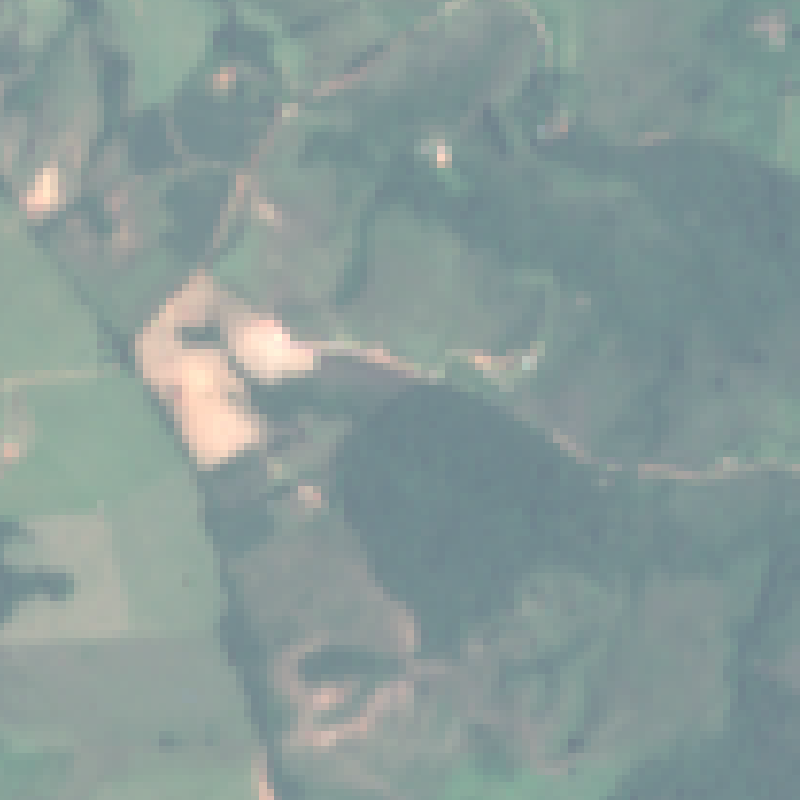

,id,data,metro/pixel
0,COPERNICUS/S2/20160407T131142_20160407T131202_...,2016-04-07T13:12:02.500Z,10
1,COPERNICUS/S2/20160407T131202_20160407T193256_...,2016-04-07T13:12:02.500Z,10
2,COPERNICUS/S2/20160507T131252_20160507T131440_...,2016-05-07T13:14:40Z,10
3,COPERNICUS/S2/20160507T131440_20160507T201221_...,2016-05-07T13:14:40.303Z,10
4,COPERNICUS/S2/20160616T131242_20160616T131245_...,2016-06-16T13:12:45.460Z,10
...,...,...,...
159,COPERNICUS/S2/20231112T131239_20231112T131242_...,2023-11-12T13:18:07.137Z,10
160,COPERNICUS/S2/20231202T131239_20231202T131238_...,2023-12-02T13:18:03.345Z,10
161,COPERNICUS/S2/20231207T131241_20231207T131235_...,2023-12-07T13:18:00.287Z,10
162,COPERNICUS/S2/20231217T131241_20231217T131237_...,2023-12-17T13:18:02.328Z,10


In [2]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display

def getScale(bands, band):
  df = pd.DataFrame(bands.iloc[0])
  try:
    return df[df['id']==band]['grid'].iloc[0]['affineTransform']['scaleX']
  except KeyError as e:
    print(f"KeyError: {e}")
    return None

coords = [-44.884065, -21.694352]       # Coordenadas do ponto central do mapa [longitude, latitude]
radius = [0.005, 0.005]             # Área de abrangência do mapa para cada direção em graus, o total será o dobro do valor informado
region = {'type': 'Polygon',
  'coordinates': [[[coords[0]-radius[0], coords[1]-radius[1]],
                   [coords[0]+radius[0], coords[1]-radius[1]],
                   [coords[0]+radius[0], coords[1]+radius[1]],
                   [coords[0]-radius[0], coords[1]+radius[1]],
                   [coords[0]-radius[0], coords[1]-radius[1]]]]}

project = 'projects/earthengine-public'
asset_id = 'COPERNICUS/S2'
name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}:listImages?{}'.format(
  name, urllib.parse.urlencode({
    'startTime': '2000-01-01T00:00:00.000Z',        # Imagens a partir desta data
    'endTime': '2025-01-01T00:00:00.000Z',         # Imagens até esta data.
    'region': str(region),
    'filter': 'CLOUDY_PIXEL_PERCENTAGE < 10',
}))

response = session.get(url)
content = json.loads(response.content)

if 'images' in content:
  df = pd.DataFrame(content['images'])

  df2 = pd.DataFrame({'id' : df['id'], 'data' : df['endTime'], 'bands' : df['bands']})

  df2['metro/pixel'] = getScale(df2['bands'],'B2')

  del df2['bands']

  name = '{}/assets/{}'.format(project, df['id'][df.shape[0]-1])

  url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
  body = json.dumps({
      'fileFormat': 'PNG',
      'bandIds': ['B4', 'B3', 'B2'],
      'region': region,
      'grid': {
          'dimensions': {'width': 800, 'height': 800},    # Tamanho da imagem baixada
      },
      'visualizationOptions': {
          'ranges': [{'min': 0, 'max': 3000}],
      },
  })

  image_response = session.post(url, body)
  image_content = image_response.content

  display(Image(image_content))
  display(df2)

else:
  print('Nenhuma imagem encontrada')

## Verificar a disponibilidade de imagens e resolução em uma coleção

Agora usaremos uma biblioteca do Earth Engine (ee) para explorar coleções de imagens e averiguar a disponibilidade para a região especificada na etapa anterior pela variável *region*.

**OBS: Por padrão a banda *B4* da imagem representa o canal *Red*, se não for o nome da banda de referência deve ser trocado.**

In [3]:
import ee
import google.auth

ee.Initialize(scoped_credentials)

dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')                       # Abrindo a coleção de imagens
#dataset = ee.ImageCollection("SKYSAT/GEN-A/PUBLIC/ORTHO/MULTISPECTRAL")
#dataset = ee.ImageCollection("SKYSAT/GEN-A/PUBLIC/ORTHO/RGB")

filtered = dataset.filterBounds(
    ee.Geometry.Polygon(region['coordinates'])).filterDate('2000-01-01', '2025-01-01')  # Definindo o período temporal

display('Número de imagens:', filtered.size().getInfo())
display('Band RGB scale:', filtered.first().select('B4').projection().nominalScale().getInfo()) # B4 é a banda padrão para o canal vermelho, troque se necessário

'Número de imagens:'

228

'Band RGB scale:'

30